## Class 10
Using the Divvy Bike data...

1) Write a function that rounds each start time to the nearest half hour and add such columns to our dataframe as starthalfhour and endhalfhour.

2) Use the datetime library's .dayofweek method to add the day of the week (i.e. Monday, Tuesday,...) to the dataframe for each trip.

3) Groupby day of the week and hours and count the number of trips. Use the unstack method on the grouped frame and plot the result.

4) Investigate the relationship between station capacity and traffic. Which two stations would you expand if you had the budget? 

5) Which stations are sources and which stations are sinks? i.e. which stations have much more departures than arrivals, and vice versa. Replot the geographic locations of the stations and using color or size visualize which stations are sources and sinks. Repeat the exercise for only weekday and only weekend trips. Do you see a difference?

### 2) Use the datetime library's .dayofweek method to add the day of the week (i.e. Monday, Tuesday,...) to the dataframe for each trip.

In [1]:
import datetime
import calendar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
trips=pd.read_csv('C:/Users/Cagdas/OneDrive/CEU/OneDrive - Central European University/Fall 2017/Python/class10/divvy_trips_august_2013.csv')

C:\Users\Cagdas\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
trips.starttime= pd.to_datetime(trips.starttime,format="%Y-%m-%d %H:%M")
trips.stoptime= pd.to_datetime(trips.stoptime,format="%m/%d/%Y %H:%M")

In [4]:
#lets try using a helper function
def convert(x):
    return x.strftime("%A")

trips['weekday'] = trips['starttime'].map(convert)

In [5]:
trips.head()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,weekday
0,134677,2013-08-01 00:13:00,2013-08-01 00:28:00,135,864,42.0,Michigan Ave & Oak St,44.0,Ogden Ave & Chicago Ave,Customer,NaN,NaN,Thursday
1,134679,2013-08-01 00:28:00,2013-08-01 00:41:00,135,767,44.0,Ogden Ave & Chicago Ave,NaN,Congress Pkwy & Ogden Ave,Customer,NaN,NaN,Thursday
2,134682,2013-08-01 00:57:00,2013-08-01 03:42:00,183,9920,337.0,Lake Shore Dr & Ohio St,43.0,Michigan Ave & Lake St,Customer,NaN,NaN,Thursday
3,134683,2013-08-01 00:57:00,2013-08-01 03:43:00,512,9931,337.0,Lake Shore Dr & Ohio St,309.0,Indiana Ave & Roosevelt Rd,Customer,NaN,NaN,Thursday
4,134684,2013-08-01 00:58:00,2013-08-01 02:32:00,656,5678,68.0,Western Ave & Winnebago Ave,68.0,Western Ave & Winnebago Ave,Customer,NaN,NaN,Thursday


In [6]:
trips.columns

Index(['trip_id', 'starttime', 'stoptime', 'bikeid', 'tripduration',
       'from_station_id', 'from_station_name', 'to_station_id',
       'to_station_name', 'usertype', 'gender', 'birthyear', 'weekday'],
      dtype='object')

In [7]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170508 entries, 0 to 170507
Data columns (total 13 columns):
trip_id              170508 non-null int64
starttime            170508 non-null datetime64[ns]
stoptime             170508 non-null datetime64[ns]
bikeid               170508 non-null int64
tripduration         170508 non-null int64
from_station_id      170198 non-null float64
from_station_name    170508 non-null object
to_station_id        170169 non-null float64
to_station_name      170508 non-null object
usertype             170508 non-null object
gender               60409 non-null object
birthyear            60364 non-null float64
weekday              170508 non-null object
dtypes: datetime64[ns](2), float64(3), int64(3), object(5)
memory usage: 16.9+ MB


### 3) Groupby day of the week and hours and count the number of trips. Use the unstack method on the grouped frame and plot the result.

In [8]:
weekdays = trips['weekday']
hours = trips['starttime'].apply(lambda d: d.hour)
by_weekday_hour = trips.groupby([weekdays, hours])['trip_id'].count()
by_weekday_hour.index.names = ['weekday', 'hour']

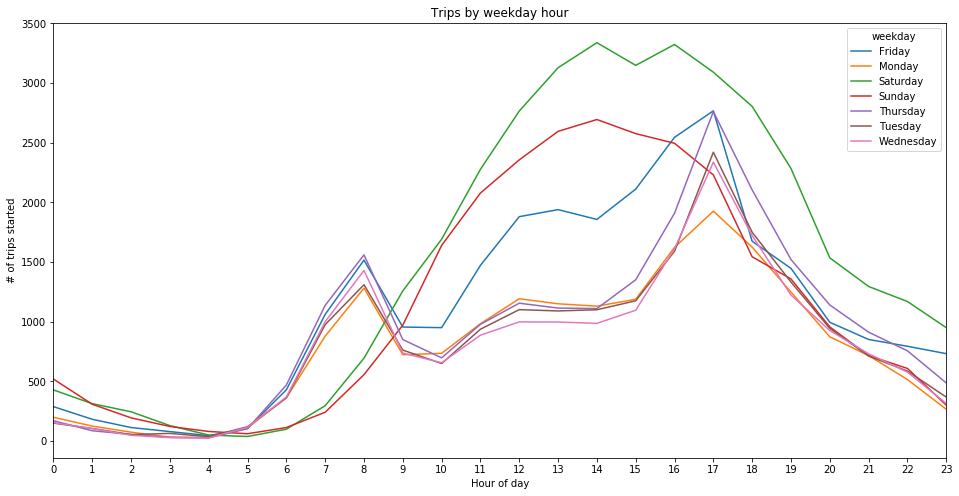

In [9]:
by_weekday_hour.unstack(0).plot(figsize=(16,8))
plt.title('Trips by weekday hour')
plt.ylabel('# of trips started')
plt.xlabel('Hour of day')
plt.xticks(range(24))
plt.xlim(0, 23);

We can clearly see that weekends and weekdays are different animals

### 4) Investigate the relationship between station capacity and traffic. Which two stations would you expand if you had the budget?

In [10]:
stations = pd.read_csv('C:/Users/Cagdas/OneDrive/CEU/OneDrive - Central European University/Fall 2017/Python/class10/Divvy_Stations_2013.csv')

In [11]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
name          300 non-null object
latitude      300 non-null float64
longitude     300 non-null float64
dpcapacity    300 non-null int64
dtypes: float64(2), int64(1), object(1)
memory usage: 9.5+ KB


In [12]:
    stations.head()

,name,latitude,longitude,dpcapacity
0,State St & Harrison St,41.873958,-87.627739,19
1,Wilton Ave & Diversey Pkwy,41.932500,-87.652681,19
2,Morgan St & 18th St,41.858086,-87.651073,15
3,Racine Ave & 18th St,41.858181,-87.656487,15
4,Wood St & North Ave,41.910329,-87.672516,15


In [13]:
trips = pd.merge(trips, stations, how='left', left_on='from_station_name', right_on='name')
trips =pd.merge(trips, stations, how='inner', left_on='to_station_name', right_on='name', suffixes=['_origin', '_dest'])
trips.head()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,...,birthyear,weekday,name_origin,latitude_origin,longitude_origin,dpcapacity_origin,name_dest,latitude_dest,longitude_dest,dpcapacity_dest
0,134677,2013-08-01 00:13:00,2013-08-01 00:28:00,135,864,42.0,Michigan Ave & Oak St,44.0,Ogden Ave & Chicago Ave,Customer,...,NaN,Thursday,Michigan Ave & Oak St,41.900960,-87.623777,15,Ogden Ave & Chicago Ave,41.896362,-87.654061,19
1,134701,2013-08-01 03:43:00,2013-08-01 04:12:00,493,1781,194.0,Ogden Ave & Race Ave,44.0,Ogden Ave & Chicago Ave,Customer,...,NaN,Thursday,Ogden Ave & Race Ave,41.891795,-87.658751,15,Ogden Ave & Chicago Ave,41.896362,-87.654061,19
2,134702,2013-08-01 03:42:00,2013-08-01 04:12:00,95,1802,194.0,Ogden Ave & Race Ave,44.0,Ogden Ave & Chicago Ave,Customer,...,NaN,Thursday,Ogden Ave & Race Ave,41.891795,-87.658751,15,Ogden Ave & Chicago Ave,41.896362,-87.654061,19
3,134704,2013-08-01 03:45:00,2013-08-01 04:12:00,197,1627,194.0,Ogden Ave & Race Ave,44.0,Ogden Ave & Chicago Ave,Customer,...,NaN,Thursday,Ogden Ave & Race Ave,41.891795,-87.658751,15,Ogden Ave & Chicago Ave,41.896362,-87.654061,19
4,134996,2013-08-01 07:45:00,2013-08-01 07:57:00,499,698,341.0,Canal St & Madison St,44.0,Ogden Ave & Chicago Ave,Customer,...,NaN,Thursday,Canal St & Madison St,41.882091,-87.639833,23,Ogden Ave & Chicago Ave,41.896362,-87.654061,19


In [14]:
trips['dpcapacity_origin'].describe()

count    170508.000000
mean         20.415441
std           7.385728
min          11.000000
25%          15.000000
50%          19.000000
75%          23.000000
max          47.000000
Name: dpcapacity_origin, dtype: float64

In [15]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170508 entries, 0 to 170507
Data columns (total 21 columns):
trip_id              170508 non-null int64
starttime            170508 non-null datetime64[ns]
stoptime             170508 non-null datetime64[ns]
bikeid               170508 non-null int64
tripduration         170508 non-null int64
from_station_id      170198 non-null float64
from_station_name    170508 non-null object
to_station_id        170169 non-null float64
to_station_name      170508 non-null object
usertype             170508 non-null object
gender               60409 non-null object
birthyear            60364 non-null float64
weekday              170508 non-null object
name_origin          170508 non-null object
latitude_origin      170508 non-null float64
longitude_origin     170508 non-null float64
dpcapacity_origin    170508 non-null int64
name_dest            170508 non-null object
latitude_dest        170508 non-null float64
longitude_dest       170508 non-null 

In [16]:
traffic =trips.groupby(['name_origin']).trip_id.count().reset_index()
traffic.columns = ['name', 'total_trips']
traffic['daily_avg_trip'] = traffic['total_trips'] / 365
traffic.sort_values('total_trips',ascending=False)[0:5]

,name,total_trips,daily_avg_trip
197,Streeter Dr & Illinois St,6005,16.452055
103,Lake Shore Dr & Monroe St,4971,13.619178
137,Millennium Park,4858,13.309589
133,Michigan Ave & Oak St,4040,11.068493
145,Museum Campus,3911,10.715068


In [17]:
traffic = pd.merge(traffic, stations)
traffic.sort_values('total_trips',ascending=False)[0:5]

,name,total_trips,daily_avg_trip,latitude,longitude,dpcapacity
197,Streeter Dr & Illinois St,6005,16.452055,41.891071,-87.612200,35
103,Lake Shore Dr & Monroe St,4971,13.619178,41.881050,-87.616970,11
137,Millennium Park,4858,13.309589,41.881032,-87.624084,35
133,Michigan Ave & Oak St,4040,11.068493,41.900960,-87.623777,15
145,Museum Campus,3911,10.715068,41.865212,-87.617759,19


In [18]:
#This is a greedy approach to the goal...

traffic['score'] = traffic['dpcapacity'] / traffic['daily_avg_trip']

traffic.sort_values('score',ascending=True)[0:5]

,name,total_trips,daily_avg_trip,latitude,longitude,dpcapacity,score
103,Lake Shore Dr & Monroe St,4971,13.619178,41.881050,-87.616970,11,0.807685
133,Michigan Ave & Oak St,4040,11.068493,41.900960,-87.623777,15,1.355198
36,Clark St & North Ave,3156,8.646575,41.911791,-87.631841,15,1.734791
145,Museum Campus,3911,10.715068,41.865212,-87.617759,19,1.773204
197,Streeter Dr & Illinois St,6005,16.452055,41.891071,-87.612200,35,2.127394


Lake Shore Dr & Monroe St and Michigan Ave & Oak St are scoring the worse. I would increase their capacity

### 5) Which stations are sources and which stations are sinks? i.e. which stations have much more departures than arrivals, and vice versa. Replot the geographic locations of the stations and using color or size visualize which stations are sources and sinks. Repeat the exercise for only weekday and only weekend trips. Do you see a difference?

In [19]:
departures = trips.groupby(['from_station_name']).to_station_name.count().reset_index()
arrivals = trips.groupby(['to_station_name']).from_station_name.count().reset_index()

arrivals.columns = ['name', 'arrivals']
departures.columns = ['name', 'departures']

arr_dep = pd.merge(departures, arrivals)
arr_dep.head()

,name,departures,arrivals
0,900 W Harrison,285,261
1,Aberdeen St & Jackson Blvd,613,577
2,Aberdeen St & Madison St,935,1024
3,Adler Planetarium,47,51
4,Ashland Ave & 21st St,25,21


In [20]:
arr_dep['diff'] = arr_dep['departures'] - arr_dep['arrivals']

arr_dep.sort_values('diff',ascending=False)[0:5] #sources

,name,departures,arrivals,diff
134,Michigan Ave & Washington St,2500,2005,495
46,Clinton St & Washington Blvd,2801,2398,403
66,Dearborn St & Adams St,2024,1705,319
131,Michigan Ave & Madison St,727,482,245
51,Daley Center Plaza,2019,1774,245


In [21]:
arr_dep.sort_values('diff',ascending=True)[0:5] #Sinks

,name,departures,arrivals,diff
136,Millennium Park,4858,5469,-611
196,Streeter Dr & Illinois St,6005,6471,-466
36,Clark St & North Ave,3156,3585,-429
144,Museum Campus,3911,4200,-289
132,Michigan Ave & Oak St,4040,4301,-261


In [22]:
arr_dep = pd.merge(arr_dep, stations)
arr_dep.head()

,name,departures,arrivals,diff,latitude,longitude,dpcapacity
0,900 W Harrison,285,261,24,41.874500,-87.649800,19
1,Aberdeen St & Jackson Blvd,613,577,36,41.877726,-87.654787,15
2,Aberdeen St & Madison St,935,1024,-89,41.881487,-87.654752,19
3,Adler Planetarium,47,51,-4,41.866095,-87.607267,19
4,Ashland Ave & 21st St,25,21,4,41.853810,-87.665897,15


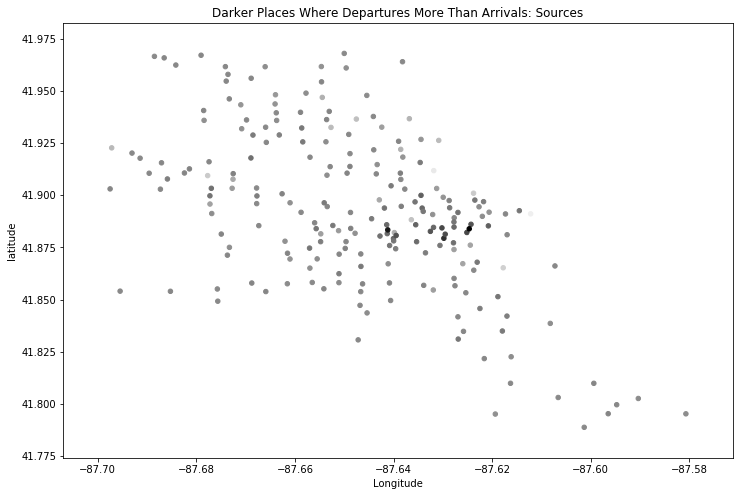

In [40]:
arr_dep.plot(kind='scatter',x='longitude',y='latitude', c=arr_dep['diff'], figsize=(12,8))

plt.title('Darker Places Where Departures More Than Arrivals: Sources')
plt.ylabel('latitude')
plt.xlabel('Longitude');

In [55]:
#now repeat it with weekends

In [56]:
weekdays_departures = trips.groupby(['from_station_name', 'weekday']).to_station_name.count().reset_index()
weekdays_arrivals = trips.groupby(['to_station_name', 'weekday']).from_station_name.count().reset_index()

weekdays_arrivals.columns = ['name', 'weekday', 'arrivals']
weekdays_departures.columns = ['name', 'weekday', 'departures']

weekdays_arr_dep = pd.merge(weekdays_departures, weekdays_arrivals)
weekdays_arr_dep.head()

,name,weekday,departures,arrivals
0,900 W Harrison,Friday,55,55
1,900 W Harrison,Monday,33,30
2,900 W Harrison,Saturday,30,19
3,900 W Harrison,Sunday,26,18
4,900 W Harrison,Thursday,42,38


In [57]:
weekdays_arr_dep['diff'] = weekdays_arr_dep['departures'] - weekdays_arr_dep['arrivals']

weekdays_arr_dep.head()

,name,weekday,departures,arrivals,diff
0,900 W Harrison,Friday,55,55,0
1,900 W Harrison,Monday,33,30,3
2,900 W Harrison,Saturday,30,19,11
3,900 W Harrison,Sunday,26,18,8
4,900 W Harrison,Thursday,42,38,4


In [58]:
weekdays_arr_dep = pd.merge(weekdays_arr_dep, stations)
weekdays_arr_dep.head()

,name,weekday,departures,arrivals,diff,latitude,longitude,dpcapacity
0,900 W Harrison,Friday,55,55,0,41.8745,-87.6498,19
1,900 W Harrison,Monday,33,30,3,41.8745,-87.6498,19
2,900 W Harrison,Saturday,30,19,11,41.8745,-87.6498,19
3,900 W Harrison,Sunday,26,18,8,41.8745,-87.6498,19
4,900 W Harrison,Thursday,42,38,4,41.8745,-87.6498,19


In [59]:
mask = (weekdays_arr_dep['weekday'] == 'Saturday') | (weekdays_arr_dep['weekday'] == 'Sunday')
only_weekends = weekdays_arr_dep[mask]

In [60]:
mask2 = (weekdays_arr_dep['weekday'] != 'Saturday') & (weekdays_arr_dep['weekday'] != 'Sunday')
only_weekdays = weekdays_arr_dep[mask2]

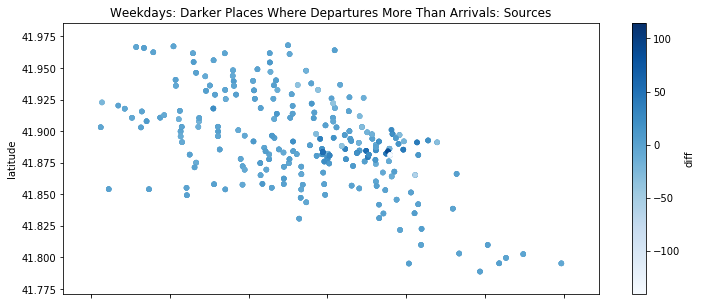

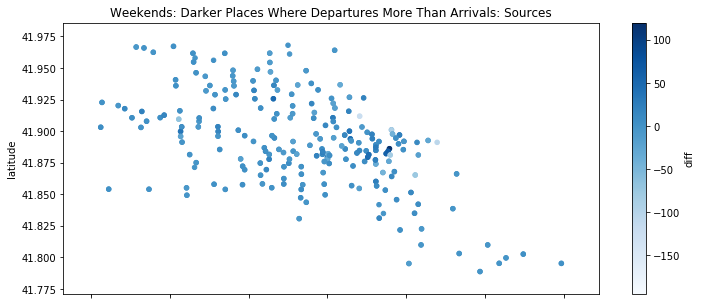

In [118]:
plt.figure()

only_weekdays.plot.scatter(x='longitude',y='latitude', c='diff', colormap='Blues', figsize=(12,5))
plt.title('Weekdays: Darker Places Where Departures More Than Arrivals: Sources')

only_weekends.plot.scatter(x='longitude',y='latitude', c='diff', colormap='Blues', figsize=(12,5))
plt.title('Weekends: Darker Places Where Departures More Than Arrivals: Sources')

plt.show();